# Prédiction du Diabète

# Introduction 


Le diabète est un problème de santé chronique (de longue durée) qui affecte la façon dont votre corps transforme les aliments en énergie. Avec le diabète, votre corps ne produit pas assez d'insuline ou ne peut pas l'utiliser aussi bien qu'il le devrait. Lorsqu'il n'y a pas assez d'insuline ou que les cellules cessent de répondre à l'insuline, trop de sucre dans le sang reste dans votre circulation sanguine. Au fil du temps, cela peut entraîner de graves problèmes de santé, tels que des maladies cardiaques, une perte de vision et une maladie rénale. Il existe 3 types de diabète, et dans ces données nous traitons du diabète de type 2. diabètes comporte 2 étapes : 
Pré-diabète  et Diabète

Dans notre projet, nous essayons de construire un modèle qui prédit le diabète chez les patients

In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
# Importation de librairies
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model

from sklearn.linear_model import LogisticRegression
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn import tree

from sklearn.metrics import accuracy_score

from sklearn.metrics import f1_score,  recall_score, precision_score, roc_curve, roc_auc_score
# from sklearn.metrics import f1_score,  recall_score, precision_score, plot_roc_curve, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2 , f_classif

from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.feature_selection import RFE
warnings.filterwarnings('ignore')

In [3]:
# Importation de données
donne= pd.read_csv ('diabetes_012_health_indicators_BRFSS2015.csv')

# visualisation des données :

# Déscription données

In [4]:
#Déscription données
donne.shape


(253680, 22)

On voit bien qu'on a 22 variables et 253680 observations 

In [5]:
donne.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


# informations sur les colonnes :

1) Diabetes_binary : vous êtes diabétique (0,1).


2) HighBP : Adultes à qui un médecin, une infirmière ou un autre professionnel de la santé a dit qu'ils faisaient de  l'hypertension (0,1)


3) HighChol : Avez-vous déjà été informé par un médecin, une infirmière ou un autre professionnel de la santé que votre taux de cholestérol sanguin était élevé ? (0,1)


4) CholCheck : contrôle du cholestérol au cours des cinq dernières années (0,1)


5) BMI : Indice de Masse Corporelle (BMI)


6) Smoker : Avez-vous fumé au moins 100 cigarettes dans toute votre vie ? [Remarque : 5 paquets = 100 cigarettes] (0,1)


7) Stroke : (Jamais dit) vous avez eu un accident vasculaire cérébral. (0,1)


8) HeartDiseaseorAttack : Répondants ayant déjà déclaré avoir une maladie coronarienne ou un infarctus du myocarde (0,1)


9) PhysActivity : Adultes ayant déclaré avoir fait de l'activité physique ou de l'exercice au cours des 30 derniers jours en dehors de leur emploi régulier (0,1)


10) Fruits : Consommer des fruits 1 ou plusieurs fois par jour (0,1)


11) Veggies : Consommer des légumes 1 ou plusieurs fois par jour (0,1)


12) HvyAlcoholConsump : Gros buveurs (hommes adultes buvant plus de 14 verres par semaine et femmes adultes buvant plus de 7 verres par semaine)(0,1)


13) AnyHealthcare : Avez-vous une couverture de soins de santé, y compris une assurance maladie, des plans prépayés tels que les HMO ou des plans gouvernementaux tels que Medicare ou Indian Health Service ? (0,1)


14) NoDocbcCost : Y a-t-il eu un moment au cours des 12 derniers mois où vous avez eu besoin de consulter un médecin, mais que vous n'avez pas pu en raison du coût ? (0,1)


15) GenHlth : Diriez-vous qu'en général votre santé est : note (1 ~ 5)


16) MentHlth : En pensant maintenant à votre santé mentale, qui comprend le stress, la dépression et les problèmes émotionnels, pendant combien de jours au cours des 30 derniers jours votre santé mentale n'a-t-elle pas été bonne ? (0 ~ 30)


17) PhysHlth : En pensant maintenant à votre santé physique, qui comprend les maladies physiques et les blessures, pendant combien de jours au cours des 30 derniers jours votre santé physique n'a-t-elle pas été bonne ? (0 ~ 30) 


18) DiffWalk : Avez-vous de sérieuses difficultés à marcher ou à monter des escaliers ? (0,1)


19) Sex : Indiquez le sexe du répondant (0,1) (Femme ou Homme) 


20) Age : Catégorie d'âge de quatorze niveaux (1 ~ 14)


21) Education : Quelle est la dernière année d'études que vous avez terminée ? (1 ~ 6)


22) Income : Est-ce que le revenu annuel de votre ménage provient de toutes les sources : (Si le répondant refuse à n'importe quel niveau de revenu, codez "Refusé".) (1 ~ 8)

In [6]:
donne.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [7]:
donne.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


# 1.2 Boites à moustaches et les histogrammes

Nous avons utilisé les boite à moustaches car La boîte à moustaches est également idéale pour comparer des distributions, car elle fait apparaître immédiatement le centre, la dispersion et l’étendue. 

<function matplotlib.pyplot.show(close=None, block=None)>

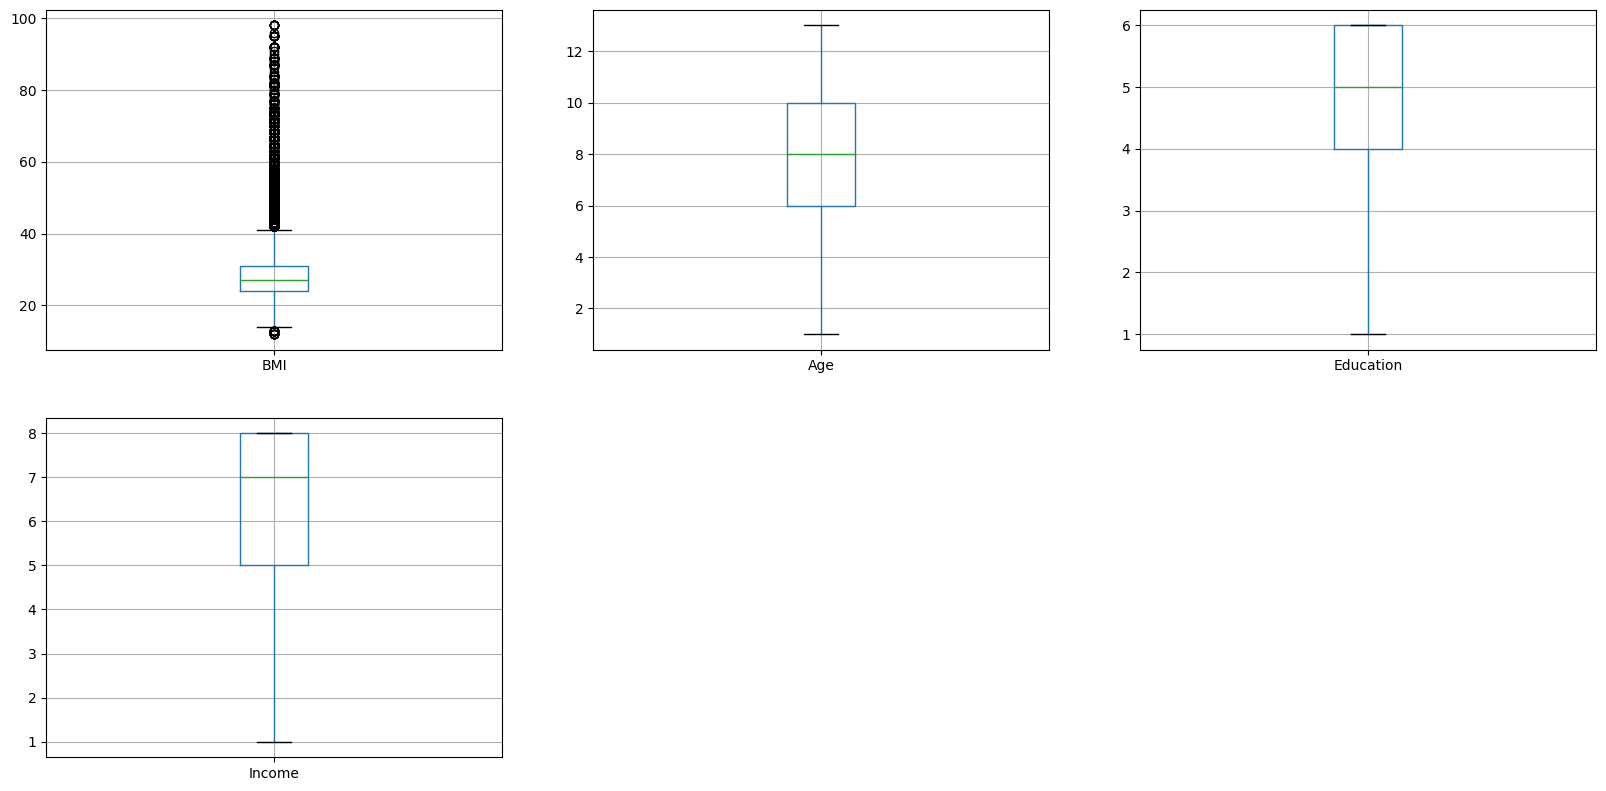

In [8]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
donne[['BMI']].boxplot()
plt.subplot(3,3,2)
donne[['Age']].boxplot()
plt.subplot(3,3,3)
donne[['Education']].boxplot()
plt.subplot(3,3,4)
donne[['Income']].boxplot()
plt.show

 Pour la variables BMI, on voit que la distributions est positivement asymétrique, car la portion de la boite et la moustaches haute sont plus longues qu’en bas de la médiane.
- La distribution Age est symétriques, car les deux moitiés de la boite sont égales ( 2  du coté haut et 2 pour coté bas). Mais pour les moustaches, on remarque bien que la moustache basse est plus long que celle en haut.
- la distribution Education est symétriques au niveau du boite parce que  les deux moitiés sont égales (1 pour les deux  cotés). Au niveau des moustaches, on remarque   que la partie en bas est beaucoup plus longue que celle en haut.
- Pour la variable Incom, le centre de la distribution est le plus élevé des 4 distributions (mediane 7). La distribution income est négativement asymetrique, car la portion en bas e la boite et la moustache basse sont plus longues du coté haut.

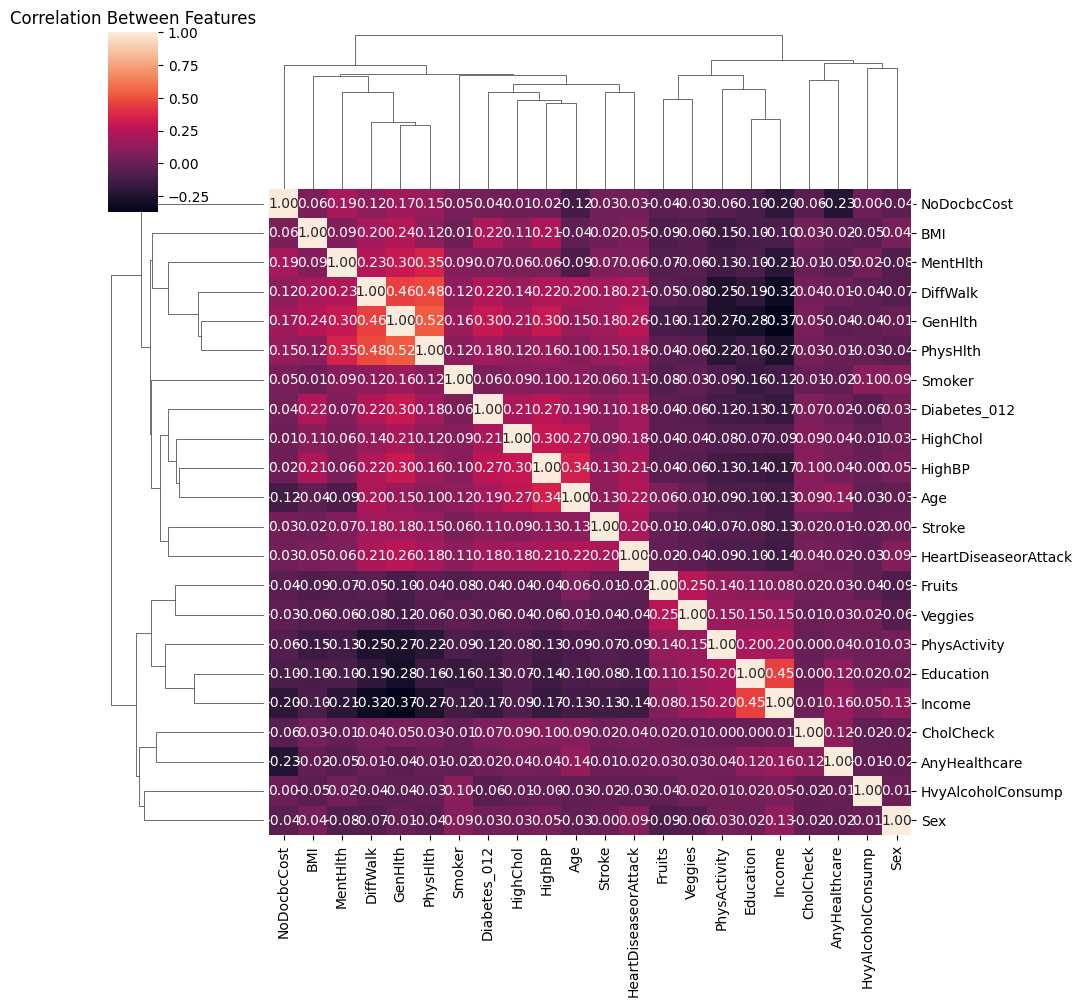

In [9]:
# Matrice de correlation
corr_data = donne.corr() 
sns.clustermap(corr_data,annot= True,fmt = '.2f')
plt.title('Correlation Between Features')
plt.show();

In [10]:
donne['Diabetes_012'].value_counts()

0.0    213703
2.0     35346
1.0      4631
Name: Diabetes_012, dtype: int64

Passant maintenant au transformation des données sur la copie de notre données.
Comme nous avons les données sont sous forme entière dans nous avons crée une copie dont les données ne sont pas entières. Par exemple,  dans la variables  Diabetes_012  0 veut dire que No diabète, 1 Pre-diabtète et 2 Diabète. 


In [11]:
donne_copy=donne.copy()

In [12]:
#Transformation de données
donne_copy.Diabetes_012[donne_copy['Diabetes_012'] == 0] = 'No Diabetes'
donne_copy.Diabetes_012[donne_copy['Diabetes_012'] == 1] = 'Pre Diabetes'
donne_copy.Diabetes_012[donne_copy['Diabetes_012'] == 2] = 'Diabetes'

donne_copy.HighBP[donne_copy['HighBP'] == 0] = 'No High'
donne_copy.HighBP[donne_copy['HighBP'] == 1] = 'High BP'

donne_copy.HighChol[donne_copy['HighChol'] == 0] = 'No High Cholesterol'
donne_copy.HighChol[donne_copy['HighChol'] == 1] = 'High Cholesterol'

donne_copy.CholCheck[donne_copy['CholCheck'] == 0] = 'No Cholesterol Check in 5 Years'
donne_copy.CholCheck[donne_copy['CholCheck'] == 1] = 'Cholesterol Check in 5 Years'

donne_copy.Smoker[donne_copy['Smoker'] == 0] = 'No'
donne_copy.Smoker[donne_copy['Smoker'] == 1] = 'Yes'

donne_copy.Stroke[donne_copy['Stroke'] == 0] = 'No'
donne_copy.Stroke[donne_copy['Stroke'] == 1] = 'Yes'

donne_copy.HeartDiseaseorAttack[donne_copy['HeartDiseaseorAttack'] == 0] = 'No'
donne_copy.HeartDiseaseorAttack[donne_copy['HeartDiseaseorAttack'] == 1] = 'Yes'

donne_copy.PhysActivity[donne_copy['PhysActivity'] == 0] = 'No'
donne_copy.PhysActivity[donne_copy['PhysActivity'] == 1] = 'Yes'

donne_copy.Fruits[donne_copy['Fruits'] == 0] = 'No'
donne_copy.Fruits[donne_copy['Fruits'] == 1] = 'Yes'

donne_copy.Veggies[donne_copy['Veggies'] == 0] = 'No'
donne_copy.Veggies[donne_copy['Veggies'] == 1] = 'Yes'

donne_copy.HvyAlcoholConsump[donne_copy['HvyAlcoholConsump'] == 0] = 'No'
donne_copy.HvyAlcoholConsump[donne_copy['HvyAlcoholConsump'] == 1] = 'Yes'

donne_copy.AnyHealthcare[donne_copy['AnyHealthcare'] == 0] = 'No'
donne_copy.AnyHealthcare[donne_copy['AnyHealthcare'] == 1] = 'Yes'

donne_copy.NoDocbcCost[donne_copy['NoDocbcCost'] == 0] = 'No'
donne_copy.NoDocbcCost[donne_copy['NoDocbcCost'] == 1] = 'Yes'
donne_copy.GenHlth[donne_copy['GenHlth'] == 1] = 'Excellent'
donne_copy.GenHlth[donne_copy['GenHlth'] == 2] = 'Very Good'
donne_copy.GenHlth[donne_copy['GenHlth'] == 3] = 'Good'
donne_copy.GenHlth[donne_copy['GenHlth'] == 4] = 'Fair'
donne_copy.GenHlth[donne_copy['GenHlth'] == 5] = 'Poor'

donne_copy.DiffWalk[donne_copy['DiffWalk'] == 0] = 'No'
donne_copy.DiffWalk[donne_copy['DiffWalk'] == 1] = 'Yes'

donne_copy.Sex[donne_copy['Sex'] == 0] = 'Female'
donne_copy.Sex[donne_copy['Sex'] == 1] = 'Male'

donne_copy.Education[donne_copy['Education'] == 1] = 'Never Attended School'
donne_copy.Education[donne_copy['Education'] == 2] = 'Elementary'
donne_copy.Education[donne_copy['Education'] == 3] = 'Some high school'
donne_copy.Education[donne_copy['Education'] == 4] = 'High school graduate'
donne_copy.Education[donne_copy['Education'] == 5] = 'Some college or technical school'
donne_copy.Education[donne_copy['Education'] == 6] = 'College graduate'

donne_copy.Income[donne_copy['Income'] == 1] = 'Less Than $10,000'
donne_copy.Income[donne_copy['Income'] == 2] = 'Less Than $10,000'
donne_copy.Income[donne_copy['Income'] == 3] = 'Less Than $10,000'
donne_copy.Income[donne_copy['Income'] == 4] = 'Less Than $10,000'
donne_copy.Income[donne_copy['Income'] == 5] = 'Less Than $35,000'
donne_copy.Income[donne_copy['Income'] == 6] = 'Less Than $35,000'
donne_copy.Income[donne_copy['Income'] == 7] = 'Less Than $35,000'
donne_copy.Income[donne_copy['Income'] == 8] = '$75,000 or More'

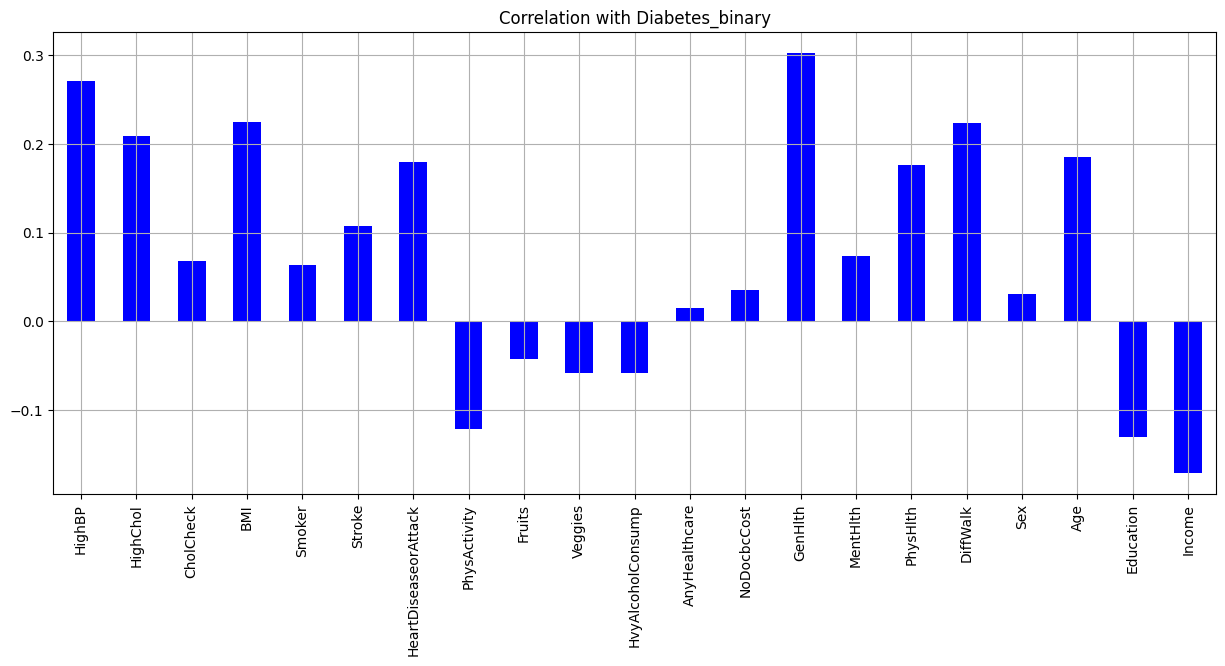

In [13]:
donne.drop('Diabetes_012', axis=1).corrwith(donne.Diabetes_012).plot(kind='bar', grid=True, figsize=(15, 6)
, title="Correlation with Diabetes_binary",color="blue");

In [14]:
donne_copy['Diabetes_012'].value_counts()

No Diabetes     213703
Diabetes         35346
Pre Diabetes      4631
Name: Diabetes_012, dtype: int64

Rapport de diabète dans l'ensemble de données avec leurs types

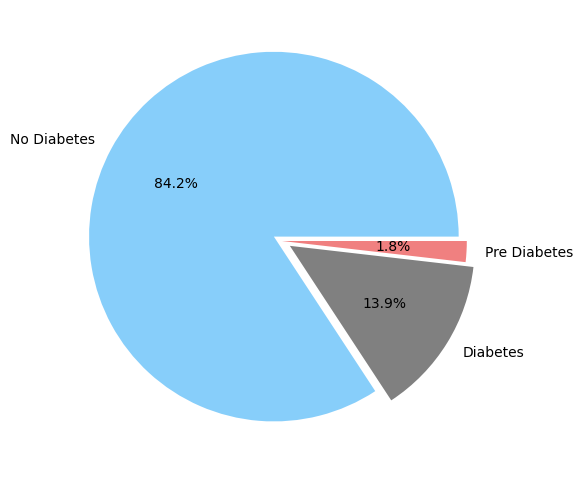

In [15]:
plt.figure(figsize=(8,6))
labels = ['No Diabetes', 'Diabetes', 'Pre Diabetes']
sizes = [donne_copy['Diabetes_012'].value_counts()[0], donne_copy['Diabetes_012'].value_counts()[1], donne_copy['Diabetes_012'].value_counts()[2]]
colors = ['lightskyblue', 'grey', 'lightcoral']
explode = (0.05, 0.05, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, autopct='%.1f%%', colors=colors, data = donne_copy);

D’après ce diagramme on remarque, No diabète est le cas le plus courant dans l’ensemble de données  suivi par les Diabètes et après le pourcentage le plus bas c’est celui de Pre-diabète.

# Distribution de diabète

Répartition du diabète entre les sexes :

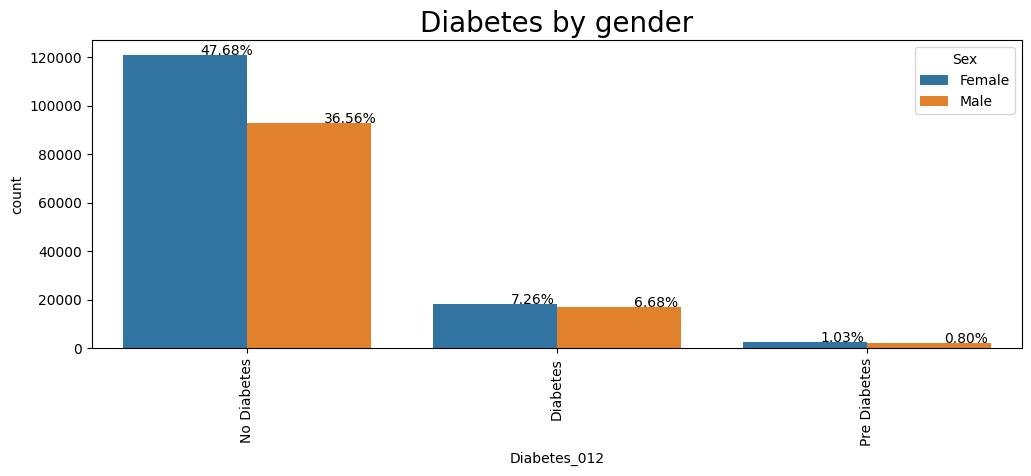

In [16]:
plt.figure(figsize=(12,4))
x= sns.countplot(x='Diabetes_012',data=donne_copy,hue='Sex')
plt.xticks(rotation=90)
plt.title('Diabetes by gender',fontdict={'fontsize':20})
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/donne_copy.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

D’après la figure ci-dessus, Nous remarquons que le sexe n'a aucun effet sur le développement du diabète.

Effet combiné du fumeur et de HvyAlcoholConsump sur le diabète :

Text(0.5, 1.0, 'Relation b/w Smoker ,HvyAlcoholConsump and Diabetes')

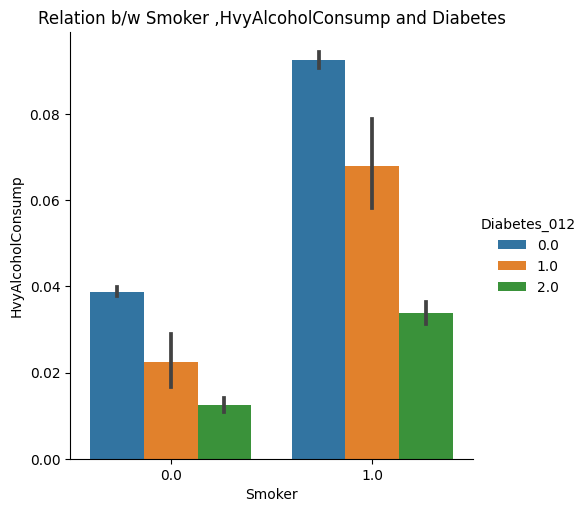

In [17]:
# (1 in Smoker is Yes), (1 in HvyAlcoholConsump is Yes), and (0 is No Diabetes, 1 is Pre Diabetes, 2 is Diabetes)

sns.catplot(x="Smoker" , y ="HvyAlcoholConsump" , data = donne , hue="Diabetes_012"  , kind="bar"  );  
plt.title("Relation b/w Smoker ,HvyAlcoholConsump and Diabetes")


selon ces données, le tabagisme et la forte consommation d'alcool augmentent ensemble le risque de diabète, puisque le nombre des gens qui fument et consomment l’alcool et ils sont diabètes plus que les autres.

Stroke: accident vasculaire cérébral

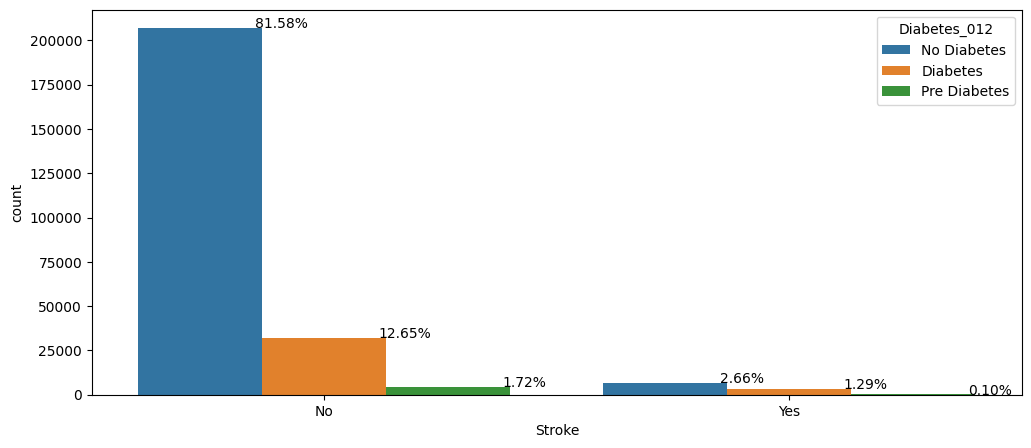

In [18]:
plt.figure(figsize=(12,5))

x= sns.countplot(x='Stroke', hue='Diabetes_012' , data = donne_copy);
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/donne_copy.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

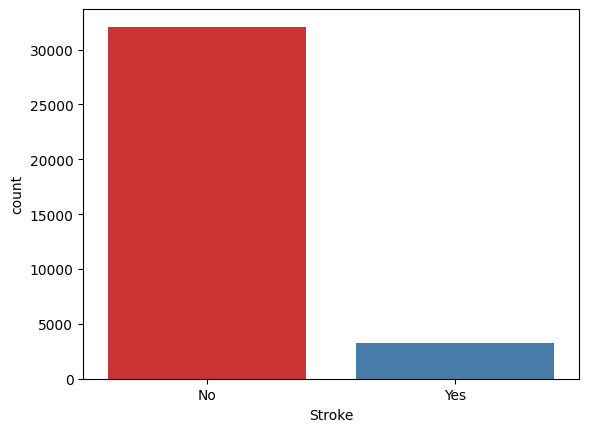

In [19]:
sns.countplot(data=donne_copy[donne_copy['Diabetes_012']=='Diabetes'],x='Stroke',palette='Set1');

D’après ces deux figures, on peut dire que Le diabète a un faible effet sur les accidents vasculaires cérébraux, mais en fait, le diabète augmente le risque d'avoir un accident vasculaire cérébral, ce qui peut endommager les tissus cérébraux et entraîner une invalidité ou même la mort.

HeartDiseaseorAttack : Maladie cardiaque ou attaque

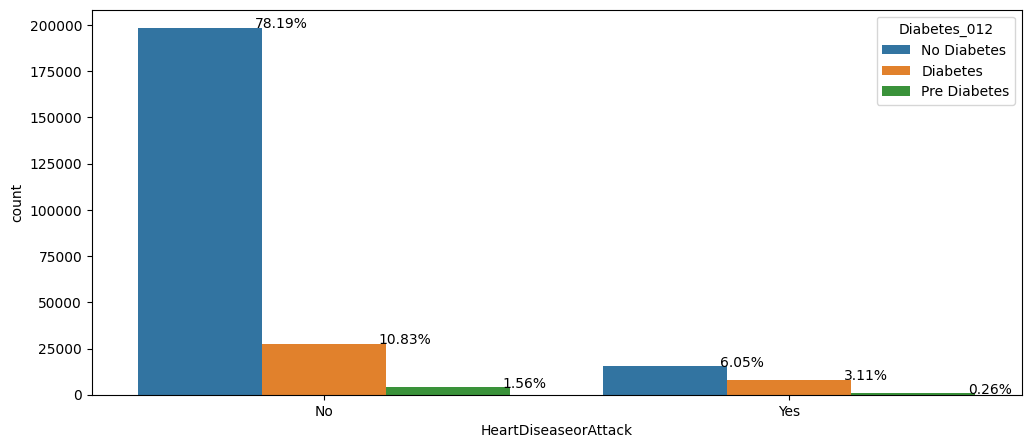

In [20]:
plt.figure(figsize=(12,5))

x= sns.countplot(x='HeartDiseaseorAttack', hue='Diabetes_012' , data = donne_copy);
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/donne_copy.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()



Le risque de diabète augmente à mesure que la personne souffre d'une maladie cardiaque ou d'une attaque, parce que on voit que il y a un pourcentage des gens qui sont diabète  et ils ont déjà une attaque cardiaque.

Effet combiné de l'AVC et de la maladie cardiaque ou de l'attaque sur le diabète:

Text(0.5, 1.0, 'Relation between Stroke ,HeartDiseaseorAttack and Diabetes')

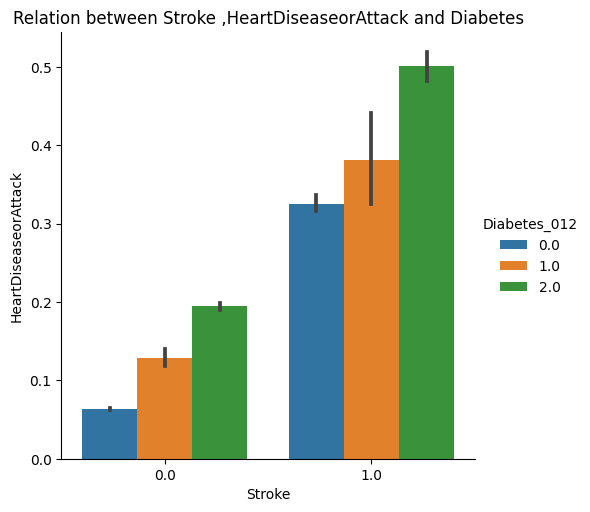

In [21]:
# (1 in Stroke is Yes), (1 in HeartDiseaseorAttack is Yes), and (0 is No Diabetes, 1 is Pre Diabetes, 2 is Diabetes)  

sns.catplot(x="Stroke" , y ="HeartDiseaseorAttack" , data = donne , hue="Diabetes_012"  , kind="bar"  );
plt.title("Relation between Stroke ,HeartDiseaseorAttack and Diabetes")


Selon ces données, les AVC et les maladies cardiaques ou les crises cardiaques augmentent ensemble le risque de diabète.

Vérification de l'effet combiné de HighBP et HighChol sur le diabète :

Text(0.5, 1.0, 'Relation between HighBP ,HighChol and Diabetes')

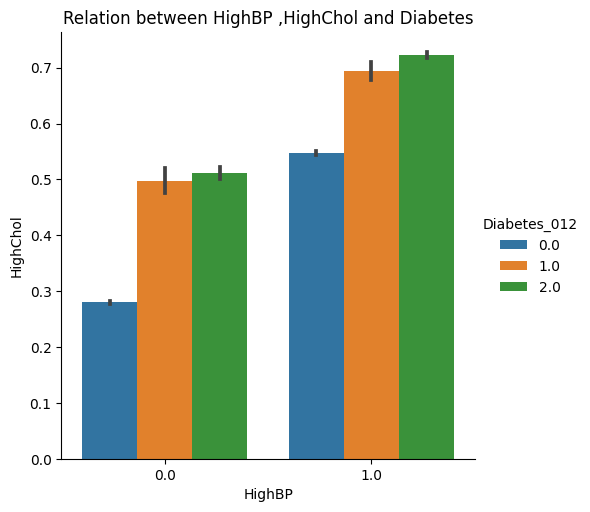

In [22]:
# (1 in HighBP is Yes), (1 in HighChol is Yes), and (0 is No Diabetes, 1 is Pre Diabetes, 2 is Diabetes)  

sns.catplot(x="HighBP" , y ="HighChol" , data = donne , hue="Diabetes_012" , kind="bar" );
plt.title("Relation between HighBP ,HighChol and Diabetes")

D’après  la figure, il est claire que HighBP  et HighChol augmentent le risque de diabètes.

Effet d'Age: 

In [23]:
age = pd.cut(donne_copy['Age'],bins=[0,4,7,10,12,14],labels=['18:34','35:49','50:64','65:74','75 and older'])
age

0         50:64
1         35:49
2         50:64
3         65:74
4         65:74
          ...  
253675    35:49
253676    65:74
253677    18:34
253678    35:49
253679    50:64
Name: Age, Length: 253680, dtype: category
Categories (5, object): ['18:34' < '35:49' < '50:64' < '65:74' < '75 and older']

<Figure size 1000x600 with 0 Axes>

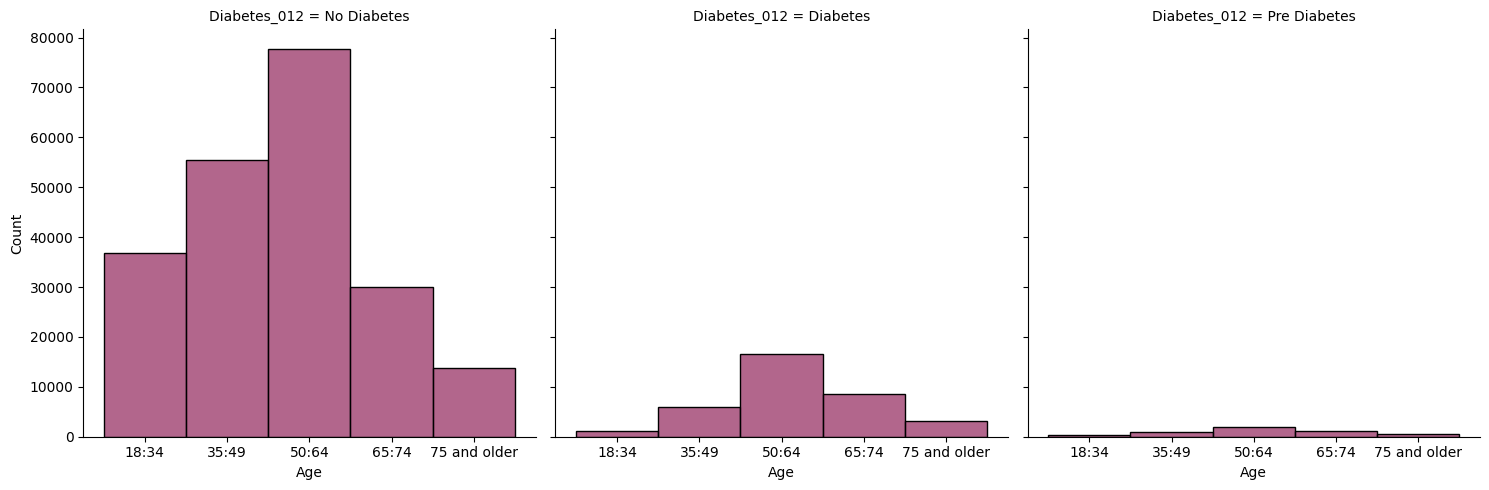

In [24]:
plt.figure(figsize=(10,6))
sns.displot(data=donne_copy,col='Diabetes_012',x=age,color='#993366');

On remarque que les personnes de 50 et 64 ans ont plus de chances de développer un diabète.

La relation entre PhyActivity et GenHlth :

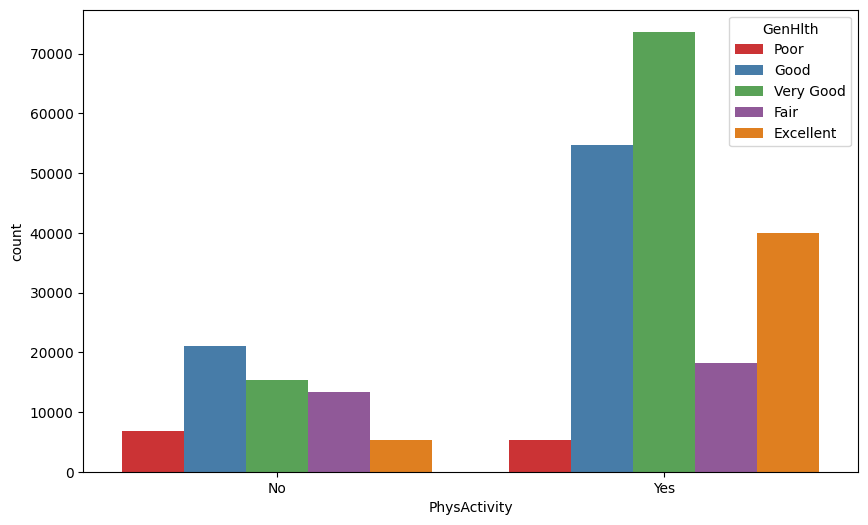

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(data=donne_copy,x='PhysActivity',hue='GenHlth',palette='Set1');


l'activité physique affecte considérablement la santé générale, car les personnes qui font de l'exercice physique ont une bien meilleure santé en générale.


BMI

In [26]:
BMI=pd.cut( donne['BMI'],bins=[0,18.5,25,30,80],labels=['Underweight','Normal weight','Overweight','Obesity'])

In [27]:
dd=pd.crosstab(donne_copy['Diabetes_012'],BMI,rownames=['Diabetes'])
dd=dd.astype(float)

In [28]:
Diabetes_sum_lst=list(dd.transpose().sum().values)
for idx in range(dd.values.shape[0]):
    dd.values[idx]= dd.values[idx]/Diabetes_sum_lst[idx]*100

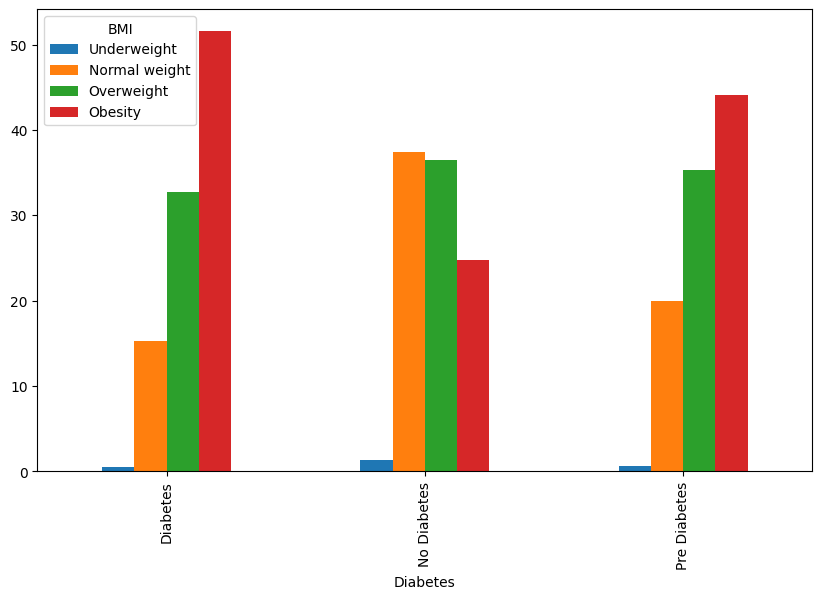

In [29]:
dd.plot(kind="bar",figsize=(10,6));

Selon l'histogramme, on déduit que la plus part des gens qui sont diabète, sont obèse. Alors on peut déduire que l'obésité est un facteur primordiale du diabète.

# Séparation de données

Le séparation de données  permet d'éviter le surajustement et d'améliorer la précision de l'ensemble de données d'entraînement.

In [30]:
dt=donne.copy()


In [31]:
y = dt['Diabetes_012']
x = dt.drop(['Diabetes_012'], axis=1)

x_train , x_test , y_train , y_test = train_test_split(x,y , test_size= 0.25 , random_state=42)




# La sélection des variables implorante

In [32]:
rf2 = RandomForestClassifier(random_state = 1, max_features = 'sqrt', n_jobs = 1, verbose = 1)
rf2.fit(x_train, y_train)
rf2.score(x_test, y_test)

print(rf2.score(x_train, y_train))
print(rf2.score(x_test, y_test))

feature = pd.Series(rf2.feature_importances_, index = x_train.columns).sort_values(ascending = False)
print(feature)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   19.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.9935088825817303
0.8423683380637023
BMI                     0.185007
Age                     0.121469
Income                  0.100116
PhysHlth                0.084516
Education               0.070405
GenHlth                 0.069484
MentHlth                0.064286
HighBP                  0.040245
Smoker                  0.033928
Fruits                  0.033881
Sex                     0.028132
HighChol                0.026262
Veggies                 0.026192
PhysActivity            0.025691
DiffWalk                0.022888
HeartDiseaseorAttack    0.018396
NoDocbcCost             0.015521
Stroke                  0.012507
AnyHealthcare           0.009031
HvyAlcoholConsump       0.008161
CholCheck               0.003882
dtype: float64


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.9s finished


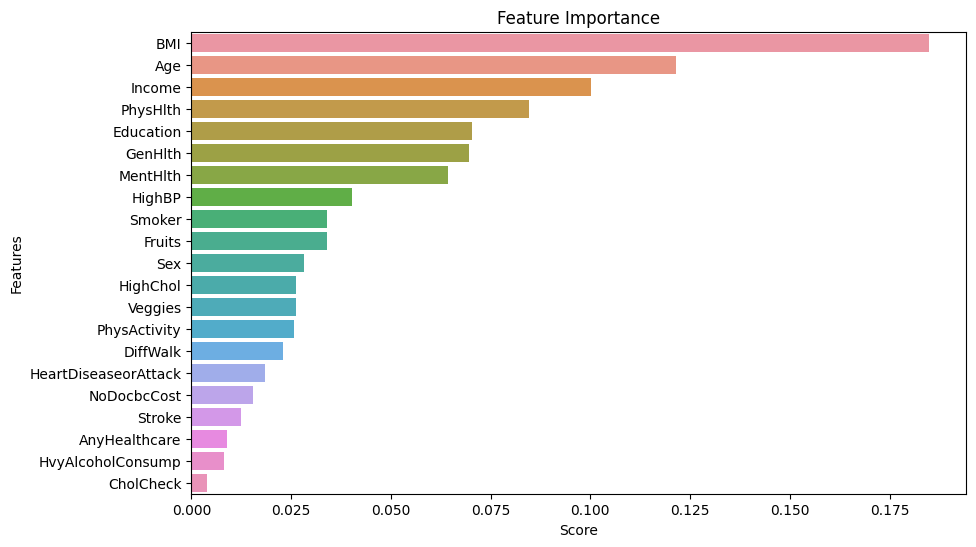

In [33]:
plt.figure(figsize = (10,6))
sns.barplot(x = feature, y = feature.index)
plt.title("Feature Importance")
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()

La variable la plus importante est BMI

# Regression Logistique


Pour appliquer la régression logistique, on a utilisé la librairie Sklearn

La régression logistique est un modèle statistique permettant d’étudier les relations entre un ensemble de variables qualitatives Xi et une variable qualitative Y. Il s’agit d’un modèle linéaire généralisé utilisant une fonction logistique comme fonction de lien. 

Un modèle de régression logistique permet aussi de prédire la probabilité qu’un événement arrive (valeur de 1) ou non (valeur de 0) à partir de l’optimisation des coefficients de régression. Ce résultat varie toujours entre 0 et 1. Lorsque la valeur prédite est supérieure à un seuil, l’événement est susceptible de se produire, alors que lorsque cette valeur est inférieure au même seuil, il ne l’est pas.


In [34]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(x_train, y_train)

ModuleNotFoundError: No module named 'imblearn'

Nous avons maintenant x_train prêt à être introduit dans la classification de régression logistique.


In [ ]:
# fonction de construction d'un modèle de régression logistique
log_reg = LogisticRegression()
#  fit the model
log_reg.fit(X_res, y_res)

In [ ]:
# scoring the model 
print(log_reg.score(X_res, y_res))
print(log_reg.score(x_test, y_test))

Le rapport de classification est un autre moyen d'évaluer les performances du modèle de classification. Il affiche les scores de précision, de rappel, de f1 et de support pour le modèle. 

In [ ]:
# construction d'un modèle de régression logistique avec tous les prédictions disponible
y_pred_train_lg = log_reg.predict(X_res)
acc_train_lg = accuracy_score(y_res, y_pred_train_lg)

y_pred_test_lg = log_reg.predict(x_test)
acc_test_lg = accuracy_score(y_test, y_pred_test_lg)
print(acc_train_lg)
print(acc_test_lg)

In [ ]:
# Classification Report
print(classification_report(y_test, y_pred_test_lg))

La précision peut être définie comme le pourcentage de résultats positifs correctement prédits sur tous les résultats positifs prédits.

In [ ]:
print('Precision: %.3f' % precision_score(y_test, y_pred_test_lg,average="micro"))
print('Recall: %.3f' % recall_score(y_test, y_pred_test_lg,average="micro"))
print('F-measure: %.3f' % f1_score(y_test, y_pred_test_lg,average="micro"))


F-measure ici est  calculée comme la moyenne harmonique de la précision et du rappel, en donnant à chacun la même pondération. Il permet d'évaluer un modèle en tenant compte à la fois de la précision et du rappel à l'aide d'un score unique.

In [ ]:
y_pred_prob_lg = log_reg.predict_proba(x_test)
roc_auc_score_lg= roc_auc_score(y_test, y_pred_prob_lg, multi_class="ovr")

print('ROC AUC Score: ',roc_auc_score_lg)

puisque le Roc auc score est égal à 0.75, on peut conclure que ce modèle est juste.

# Conclusion

D'après cette analyse on conclut que les variables principales qui caractérisent le diabète sont :


HIghBP , HighChol , BMI , Stroke , GenHlth , MentHlth , PhysHlth , Age , Eduation and Income.


Les variables qui augmentent le risque de diabète sont : 

Tabagisme et HvyAlcoholConsump , Stroke et HeartDiseaseorAttack , HighBP et HighChol.



Les variables de caractéristique qui sont les moins efficaces sur le diabète, mais qui peuvent aider à diminuer le risque de diabète sont : PhysActivity, Fruits, Veggies, AnyHealthcare, CholChek.

    



Durant ce projet de PAO, nous avons bien familiarisé avec les outils de maching learning : régression logistique, les librairies standards comme numpy et sklearn.


Comme n'importe quel projet, nous avons passé par plusieurs difficultés, par exemple l'implémentation de régression logistique en python.